In [41]:
!pip install pandas

In [42]:
import pandas as pd
file_path='Combined_set_prescreened.csv';
total_info=pd.read_csv(file_path)
print(total_info)

                                               MOF  uptake_ads  uptake_des  \
0                                   XUKYEI_neutral    0.920997    0.668303   
1                           ja300034j_si_002_clean    0.433112    0.187346   
2                                   QIYDAF01_clean    0.827077    0.660425   
3                                     XAHPIH_clean    0.818678    0.634451   
4                                     VETMIS_clean    0.932519    0.746597   
...                                            ...         ...         ...   
7180                                  AQOTIK_clean    0.026746    0.110716   
7181  acs.inorgchem.6b00276_ic6b00276_si_006_clean    0.421515    0.395023   
7182  acs.inorgchem.6b01762_ic6b01762_si_002_clean    0.087637    0.074696   
7183  acs.inorgchem.6b02696_ic6b02696_si_002_clean    0.294982    0.280449   
7184              acscombsci.5b00188_5036495_clean    0.549701    0.613880   

      heat_ads  heat_des      LISD      LFSD     LISFS  Unit_ce

In [43]:
# Drop rows with any NaN values
total_info_cleaned = total_info.dropna()

total_info_cleaned

,MOF,uptake_ads,uptake_des,heat_ads,heat_des,LISD,LFSD,LISFS,Unit_cell_volume,Density,...,O,La,Cr,Ti,Ba,Rh,Ce,Cu,Al,Re
0,XUKYEI_neutral,0.920997,0.668303,-21.55231,-18.39099,13.18217,10.20370,13.18217,6140.000,0.287208,...,0,0,0,0,0,0,0,2,0,0
1,ja300034j_si_002_clean,0.433112,0.187346,-25.96441,-17.79542,17.49700,17.44104,17.49700,2800.680,0.713223,...,18,0,0,0,0,0,0,0,0,0
2,QIYDAF01_clean,0.827077,0.660425,-19.37443,-18.95302,22.00141,13.48659,22.00141,52812.600,0.303251,...,96,0,0,0,0,0,0,24,0,0
3,XAHPIH_clean,0.818678,0.634451,-21.96228,-19.54395,14.37026,13.22660,14.37026,12821.800,0.356183,...,40,0,0,0,0,0,0,8,0,0
4,VETMIS_clean,0.932519,0.746597,-22.10557,-19.92746,18.13430,11.96931,18.13430,33152.200,0.311959,...,48,0,0,0,0,0,0,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7176,AQIXUU_clean,0.001177,0.062873,-25.56586,-49.26611,5.00071,3.78897,5.00071,787.077,2.316180,...,18,0,0,0,0,0,0,0,0,0
7177,AFOVOH_clean,0.165457,0.232918,-28.96937,-40.77527,8.74251,6.51591,8.19585,1598.690,1.048160,...,12,0,0,0,0,0,0,0,0,0
7178,ATIJUJ_manual,0.038061,0.186922,-10.98116,-19.63789,17.44029,16.95446,17.44029,3081.950,0.753394,...,18,0,0,0,0,0,0,0,0,0
7179,AFOVEX_clean,0.172913,0.244083,-29.31178,-38.54721,8.76979,6.57643,8.76042,1626.110,1.022060,...,12,0,0,0,0,0,2,0,0,0


In [44]:
uptake_ads = total_info_cleaned['uptake_ads']
uptake_des = total_info_cleaned['uptake_des']
heat_ads = total_info_cleaned['heat_ads']
heat_des = total_info_cleaned['heat_des']

In [45]:
# Given constants
delta_H_vap_Tev = 16.25          # Example value in kJ/mol
M_w = 0.044097                   # Molar mass in kg/mol
C_sorbent_p = 1                  # Specific heat capacity in kJ/(kg*K)
T_des = 358.15                   # Desorption temperature in Kelvin
T1 = 313.13                      # Initial temperature in Kelvin

# Calculate Δq
delta_q = uptake_ads - uptake_des

# Drop rows with negative Δq
filtered_indices = delta_q >= 0
total_info_cleaned = total_info_cleaned[filtered_indices].copy()
delta_q = delta_q[filtered_indices]  # Filter delta_q to match the filtered DataFrame

# Calculate <ΔH_ads>
avg_delta_H_ads = (heat_ads + heat_des) / 2
avg_delta_H_ads = avg_delta_H_ads[filtered_indices]  # Match indices with filtered DataFrame

# Calculate COP_R for each row
total_info_cleaned.loc[:, 'COP_R'] = (delta_H_vap_Tev * delta_q) / ((M_w * C_sorbent_p * (T_des - T1)) - (delta_q * avg_delta_H_ads))

# Print the results
print(total_info_cleaned[['MOF', 'COP_R']])


                         MOF     COP_R
0             XUKYEI_neutral  0.583945
1     ja300034j_si_002_clean  0.542431
2             QIYDAF01_clean  0.522907
3               XAHPIH_clean  0.515395
4               VETMIS_clean  0.512710
...                      ...       ...
6912            SANHUN_clean  0.000327
6913            PEKVUY_clean  0.000246
6914            HEXNII_clean  0.000137
6915            IBIYUO_clean  0.000066
6916            LIDZUV_clean  0.000000

[6917 rows x 2 columns]


In [46]:
total_info_cleaned.drop(columns=["MOF","uptake_ads","heat_ads","uptake_des","heat_des","Pu"], inplace=True)

In [47]:
corr_matrix = total_info_cleaned.corr()

In [48]:
# Assuming corr_matrix is your correlation matrix DataFrame
COP_corr = corr_matrix['COP_R'].drop('COP_R').sort_values(ascending=False)
COP_corr

ASA_m2_per_g          0.824801
AV_Volume_fraction    0.819282
AV_cm3_per_g          0.757536
LISD                  0.682150
LISFS                 0.673200
                        ...   
W                    -0.053378
I                    -0.064709
No_of_Channel        -0.143384
Number_of_channels   -0.245788
Density              -0.657569
Name: COP_R, Length: 105, dtype: float64

In [49]:
COP_corr_df = filtered_corr.reset_index()
COP_corr_df.columns = ['Variable', 'Correlation with COP_R_filtered']

# Save the DataFrame to an Excel file
COP_corr_df.to_excel('COP_R_correlations_filtered.xlsx', index=False)

print("COP_R correlations have been saved to COP_R_correlations_filtered.xlsx")

COP_R correlations have been saved to COP_R_correlations_filtered.xlsx


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the correlation matrix
correlation_matrix = total_info_cleaned.corr()

# Extract correlation of 'COP_R' with all other features and filter by absolute value > 0.5
COP_corr = correlation_matrix['COP_R'].drop('COP_R')
filtered_corr = COP_corr[abs(COP_corr) > 0.5].sort_values(ascending=False)

# Print the filtered correlations
print("Filtered correlations:\n", filtered_corr)

# Define features and target
features = total_info_cleaned
target = total_info_cleaned['COP_R']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.85, random_state=42)

# Filter the training and testing sets based on the selected features
selected_features = filtered_corr.index.tolist()
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]
X_train_filtered

Filtered correlations:
 ASA_m2_per_g          0.824801
AV_Volume_fraction    0.819282
AV_cm3_per_g          0.757536
LISD                  0.682150
LISFS                 0.673200
Di                    0.655064
Dif                   0.648626
ASA_m2_per_cm3        0.600694
LFSD                  0.548575
Df                    0.535348
Density              -0.657569
Name: COP_R, dtype: float64


,ASA_m2_per_g,AV_Volume_fraction,AV_cm3_per_g,LISD,LISFS,Di,Dif,ASA_m2_per_cm3,LFSD,Df,Density
3517,1070.580,0.0632,0.059494,7.16836,7.16836,7.16836,7.16836,1137.260,4.77751,4.77751,1.062280
3421,1288.430,0.0572,0.068138,13.63782,7.29322,7.29322,7.29322,1081.600,4.00087,4.00087,0.839472
2563,1933.480,0.1462,0.150076,7.60214,7.60214,7.60214,7.60214,1883.540,4.33054,4.33054,0.974170
5622,1168.360,0.0458,0.044821,5.84666,4.98187,0.00000,0.00000,1193.890,3.39783,0.00000,1.021850
1605,3284.470,0.2106,0.280223,8.65079,8.04092,8.65079,8.65079,2468.430,6.02295,6.02295,0.751545
...,...,...,...,...,...,...,...,...,...,...,...
3772,797.165,0.0504,0.050487,8.95789,8.72502,8.95789,8.95789,795.793,5.24155,5.24155,0.998279
5191,660.454,0.0514,0.038784,7.06812,6.90977,7.06812,7.06812,875.300,3.76030,3.76030,1.325300
5226,737.343,0.0306,0.028228,5.55640,5.55640,5.55640,5.55640,799.299,4.80320,4.80320,1.084030
5390,735.562,0.0198,0.015102,4.96873,4.96873,4.96873,4.96873,964.378,3.71375,3.71375,1.311080


In [32]:

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=150, random_state=42)

# Fit the model
rf_regressor.fit(X_train_filtered, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test_filtered)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

R^2 Score: 0.7796839407631131
Mean Squared Error: 0.0015248993629337205
Root Mean Squared Error: 0.03904995983267743


In [33]:
print("for cutoff=0.2 we have R^2 score=0.790")
print("for cutoff=0.3 we have R^2 score=0.786")
print("for cutoff=0.4 we have R^2 score=0.785")
print("for cutoff=0.5 we have R^2 score=0.779")


for cutoff=0.2 we have R^2 score=0.790
for cutoff=0.3 we have R^2 score=0.786
for cutoff=0.4 we have R^2 score=0.785
for cutoff=0.5 we have R^2 score=0.779


Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Best parameters found by GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 170}


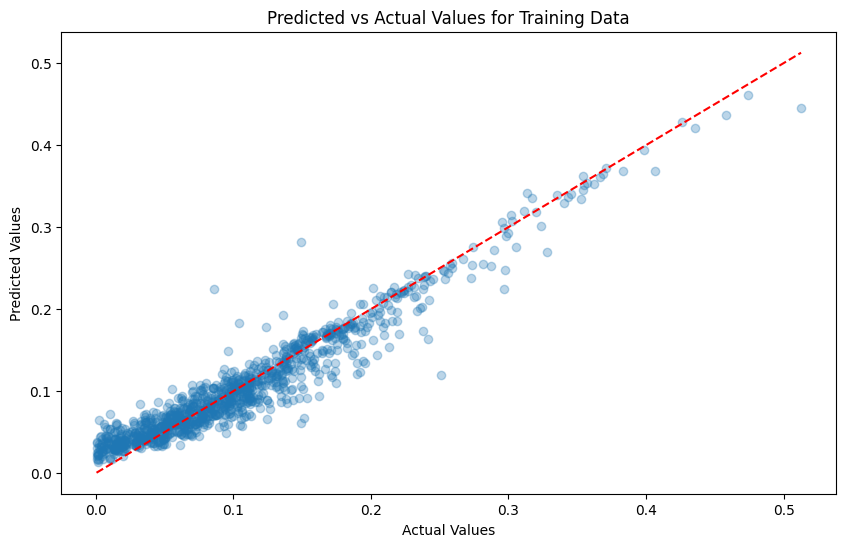

Mean Squared Error (MSE): 0.001521058687511104
R^2 Score: 0.7802388380202612


In [23]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [140,150,160,170,180],
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the filtered training data
grid_search.fit(X_train_filtered, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Predict on the training data
y_train_pred = best_rf_model.predict(X_train_filtered)

# Plot predicted vs actual values for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values for Training Data')
plt.show()

# Predict on the testing data
y_test_pred = best_rf_model.predict(X_test_filtered)

# Calculate Mean Squared Error (MSE) and R^2 score
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")